# Assessing NYC’s Community Schools Initiative: The Role of Socioeconomic and Ethnical Effects on shaping SAT Score Differences Across Schools.

## 1. Introduction

The SAT has long been regarded as a key indicator of success for college admissions in the United States. However, growing evidence suggests that SAT scores are influenced by a range of external factors beyond academic ability, including socioeconomic status and ethnicity. In an effort to address educational disparities, New York City launched the Community Schools Initiative in 2014, aiming to support underperforming schools through comprehensive services that extend beyond traditional classroom instruction. This study investigates the effect of NYC’s Community Schools Initiative on SAT scores and suggests that although the initiative targets the schools with the greatest needs, structural socioeconomic inequalities continue to influence student performance, as students with higher Economic Need Index, mainly Hispanic and Black, keep having lower SAT Performance.

### 1.1. Background

Research has repeatedly proven that a student's socioeconomic status and ethnicity is correlated with their SAT performance. In general, students with high income levels tend to perform better than those with low income levels. Although this gap has been known for years, recent studies have proven that the gap in scores is not only due to income difference, but also due to race. A 2013 study at the University of Pennsylvania found that the difference in scores between low and high income is twice as large among black students compared to white students (Dixon-Roman, Everson, & Mcardle, 2013). Most policymakers and test critics agree that standardized test scores are strongly influenced by factors that go beyond what the test aims to measure: intelligence and academic discipline. 

Considering the important role SAT scores play in students’ future, as most colleges require them for admission, the City of New York introduced Community Schools in 2014 as a strategy toward achieving an equitable educational system. This initiative addresses the needs of students by providing a wide range of services in and outside of schools including health care, mentoring, adult education and expanded learning programs. Inspired by this initiative, this study aims to explore which schools were given priority to become Community Schools immediately, and what characteristics they share in terms of socioeconomic traits and student body composition. By identifying the role of specific demographic factors in shaping score differences across the two groups (community and non-community schools), it will be possible to offer recommendations to improve this initiative and achieve educational equity in NYC high schools. 

### 1.2. Data Sources

The study employed two data sets from New York City Public High Schools between the years 2014-2016, both obtained from Kaggle.com. The main data set contains average SAT Scores (math, reading and writing sections) for 435 NYC accredited high schools, compiled by College Board. It also includes demographic information such as percent Asian, Black, Hispanic and White, for each school published by the New York City Department of Education. For the purpose of this study, and to assess the impact of the Community Schools Policy in NYC high schools, the main data set was merged with data provided by PASSNYC, a non-profit organization dedicated to broadening educational opportunities for New York City's talented underserved students. This data contains information on 1273 high schools, including community school status (Yes/No), economic need index, school estimate, average english language and math proficiency, and the same demographic indicators as the main data set (percent Asian, Black, Hispanic and White). Note that the main data set contains information for the year 2014-2015, while the second data set is from 2016. Due to the unavailability of community schools for the year 2014-2015, and in general, the study assumes that school performance didn’t change too much from 2015 to 2016, and therefore will use the datasets jointly when required.

## 2. Data Cleaning/Loading

Start by importing all the libraries that will be used for data cleaning and creating visualizations.

In [7]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean
import seaborn as sns

# activate plot theme
import qeds

We start by cleaning the 2016 data. The result of this process is a data frame containing the Zip Code and School ID for each high school, as well as the average SAT Score for each, the percentage of different ethnicities, and interesting indicators such as economic need index and absence/attendance rates. We also find whether a school is a community school or not.

In [10]:
# 2016 Average SAT Scores for each NYC High School.
scores_2016 = pd.read_csv('scores.csv')

# Filter unwanted columns and renaming.
scores_2016 = scores_2016.filter(['School ID', 'School Name','Borough',
                                  'Street Address', 'Zip Code', 'Latitude',
                                 'Longitude', 'Percent White', 'Percent Black', 
                                  'Percent Hispanic', 'Percent Asian',
                                 'Average Score (SAT Math)', 'Average Score (SAT Reading)', 
                                  'Average Score (SAT Writing)','Percent Tested'])
# Removing percentage signs.
scores_2016['Percent White'] = scores_2016['Percent White'].str.replace('%', '')
scores_2016['Percent Black'] = scores_2016['Percent Black'].str.replace('%', '')
scores_2016['Percent Hispanic'] = scores_2016['Percent Hispanic'].str.replace('%', '')
scores_2016['Percent Asian'] = scores_2016['Percent Asian'].str.replace('%', '')
scores_2016['Percent Tested'] = scores_2016['Percent Tested'].str.replace('%', '')

# Convert ethnicity percentages to float64 type.
scores_2016['Percent White'] = scores_2016['Percent White'].astype(float)
scores_2016['Percent Black'] = scores_2016['Percent Black'].astype(float)
scores_2016['Percent Asian'] = scores_2016['Percent Asian'].astype(float)
scores_2016['Percent Hispanic'] = scores_2016['Percent Hispanic'].astype(float)
scores_2016['Percent Tested'] = scores_2016['Percent Tested'].astype(float)


# Add variable for total SAT score and drop missing values.
scores_2016.dropna(subset=['Average Score (SAT Math)'], inplace=True)
scores_2016.dropna(subset=['Average Score (SAT Reading)'], inplace=True)
scores_2016.dropna(subset=['Average Score (SAT Writing)'], inplace=True)
scores_2016['Average Total SAT Score'] = scores_2016['Average Score (SAT Math)'] + scores_2016['Average Score (SAT Reading)'] + scores_2016['Average Score (SAT Writing)']

scores_2016.head(3)

,School ID,School Name,Borough,Street Address,Zip Code,Latitude,Longitude,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested,Average Total SAT Score
0,01M292,Henry Street School for International Studies,Manhattan,220 Henry Street,10002,40.71376,-73.98526,3.9,24.4,56.6,13.2,410.0,406.0,381.0,59.7,1197.0
1,01M448,University Neighborhood High School,Manhattan,200 Monroe Street,10002,40.71233,-73.98480,3.3,25.0,41.1,29.9,437.0,355.0,352.0,69.9,1144.0
2,01M450,East Side Community School,Manhattan,420 East 12th Street,10009,40.72978,-73.98304,8.3,22.1,57.9,9.4,454.0,428.0,445.0,85.2,1327.0


In [66]:
# 2016 Demographic Information.
demographics_2016 = pd.read_csv('indicators2016.csv')

# Filter unwanted columns and renaming.
demographics_2016 = demographics_2016
demographics_2016 = demographics_2016.rename(columns={'Location Code': 'School ID'})

# Removing percentage and dollar signs.
demographics_2016['Student Attendance Rate'] = demographics_2016['Student Attendance Rate'].str.replace('%', '')
demographics_2016['Percent of Students Chronically Absent'] = demographics_2016['Percent of Students Chronically Absent'].str.replace('%', '')
demographics_2016['Percent White'] = demographics_2016['Percent White'].str.replace('%', '')
demographics_2016['Percent Black'] = demographics_2016['Percent Black'].str.replace('%', '')
demographics_2016['Percent Hispanic'] = demographics_2016['Percent Hispanic'].str.replace('%', '')
demographics_2016['Percent Asian'] = demographics_2016['Percent Asian'].str.replace('%', '')

# Re-formating object variables to numeric.
demographics_2016['School Income Estimate'] = demographics_2016['School Income Estimate'].str.replace(',', '')
demographics_2016['School Income Estimate'] = demographics_2016['School Income Estimate'].str.replace('$', '')
demographics_2016['School Income Estimate'] = demographics_2016['School Income Estimate'].str.replace(' ', '')
demographics_2016['School Income Estimate'] = demographics_2016['School Income Estimate'].astype(float)
demographics_2016['School Income Estimate'] = demographics_2016['School Income Estimate'].fillna(0)
demographics_2016['Economic Need Index'] = demographics_2016['Economic Need Index'].fillna(0)

demographics_2016['Percent White'] = demographics_2016['Percent White'].astype(float)
demographics_2016['Percent Black'] = demographics_2016['Percent Black'].astype(float)
demographics_2016['Percent Asian'] = demographics_2016['Percent Asian'].astype(float)
demographics_2016['Percent Hispanic'] = demographics_2016['Percent Hispanic'].astype(float)
demographics_2016['Student Attendance Rate'] = demographics_2016['Student Attendance Rate'].astype(float)
demographics_2016['Percent of Students Chronically Absent'] = demographics_2016['Percent of Students Chronically Absent'].astype(float)

#Filter unwanted columns.
demographics_2016 = demographics_2016.filter(['District', 'School ID', 'Community School?', 'Economic Need Index', 
                                        'School Income Estimate', 'Student Attendance Rate', 'Percent of Students Chronically Absent', 
                                        'Percent White', 'Percent Black','Percent Hispanic', 'Percent Asian', 
                                        'Average ELA Proficiency', 'Average Math Proficiency', 'Longitude', 'Latitude'])

demographics_2016.head(3)

,District,School ID,Community School?,Economic Need Index,School Income Estimate,Student Attendance Rate,Percent of Students Chronically Absent,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average ELA Proficiency,Average Math Proficiency,Longitude,Latitude
0,1,01M015,Yes,0.919,31141.72,94.0,18.0,1.0,32.0,60.0,5.0,2.14,2.17,-73.978766,40.721834
1,1,01M019,No,0.641,56462.88,92.0,30.0,6.0,20.0,63.0,10.0,2.63,2.98,-73.984231,40.729892
2,1,01M020,No,0.744,44342.61,94.0,20.0,4.0,8.0,49.0,35.0,2.39,2.54,-73.986315,40.721274


In [68]:
# Merging 2016 data by School ID instead of ZIP Code (there might be two schools in the same Zip Code).
merged_data_2016 = pd.merge(scores_2016, demographics_2016, how = 'left', on=['School ID'])
merged_data_2016.head(5)

,School ID,School Name,Borough,Street Address,Zip Code,Latitude_x,Longitude_x,Percent White_x,Percent Black_x,Percent Hispanic_x,...,Student Attendance Rate,Percent of Students Chronically Absent,Percent White_y,Percent Black_y,Percent Hispanic_y,Percent Asian_y,Average ELA Proficiency,Average Math Proficiency,Longitude_y,Latitude_y
0,01M292,Henry Street School for International Studies,Manhattan,220 Henry Street,10002,40.71376,-73.98526,3.9,24.4,56.6,...,84.0,58.0,3.0,26.0,57.0,12.0,1.96,1.83,-73.986069,40.713343
1,01M448,University Neighborhood High School,Manhattan,200 Monroe Street,10002,40.71233,-73.98480,3.3,25.0,41.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M450,East Side Community School,Manhattan,420 East 12th Street,10009,40.72978,-73.98304,8.3,22.1,57.9,...,97.0,5.0,12.0,21.0,53.0,11.0,2.82,2.90,-73.982474,40.729153
3,01M509,Marta Valle High School,Manhattan,145 Stanton Street,10002,40.72057,-73.98567,2.5,39.9,51.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M539,"New Explorations into Science, Technology and ...",Manhattan,111 Columbia Street,10002,40.71873,-73.97943,28.6,13.3,18.0,...,97.0,3.0,42.0,9.0,11.0,33.0,3.83,4.03,-73.979239,40.719500


## 3. Summary Statistics Table

### Summary Table 1: Number of Community Schools per Borough.

In [42]:
# Filter relevant columns and drop missing values  
community_schools_per_borough = merged_data_2016[['Borough', 'Community School?']].dropna()  

# Group by 'Borough' and 'Community School?' to count occurrences  
Summary1 = community_schools_per_borough.groupby(['Borough', 'Community School?']).size().unstack(fill_value=0)  

# Rename columns for clarity  
Summary1.columns = ['Non-Community Schools', 'Community Schools']  

# Display the summary table  
print(Summary1)

               Non-Community Schools  Community Schools
Borough                                                
Bronx                             17                  3
Brooklyn                          18                  2
Manhattan                         14                  2
Queens                            15                  0
Staten Island                      1                  0


**Summary Table 1** was obtained after merging the two data sets. It shows that the data is complete across the two data sets for only a few high schools (69) compared to what is available in the initial data sets (435 and 1273). This means that data on SAT Scores is only available for 69 of the schools of which we know Community/Non-Community status.

The table shows that community schools tend to be located in the borough of Bronx, Brooklyn and Manhattan, which are the three boroughs with lowest average total SAT scores (1202, 1230, 1340) as observed in **Summary Table 2**. Note that the difference between Manhattan and Queens is only about 5 points in average total SAT scores, yet Manhattan was considered for Community Schools and Queens was not. If we observe **Summary Table 2** closely, we can see that Manhattan is the second borough with the most Hispanic students (51%), after Bronx (62%), while Queens has only 34%. Another interesting finding is that Staten Island, where schools have 45% White students on average, have zero Community Schools, yet the highest average total SAT score (1439).

### Summary Table 2: SAT Scores & Demographics by Borough.

Note that Summary Table 2 was split in two for visualization purposes.

In [135]:
demographics_by_borough = scores_2016.filter(['Borough', 'Average Score (SAT Math)', 'Average Score (SAT Reading)', 
                                                    'Average Score (SAT Writing)', 'Average Total SAT Score', 'Percent Tested',
                                                    'Percent Asian','Percent Black', 'Percent Hispanic','Percent White'])
demographics_by_borough.dropna(inplace = True)

Summary2a = demographics_by_borough.groupby('Borough')
Summary2a[['Average Total SAT Score', 'Average Score (SAT Math)', 'Average Score (SAT Reading)','Average Score (SAT Writing)']].mean()

,Average Total SAT Score,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing)
Borough,,,,
Bronx,1202.724490,404.357143,402.520408,395.846939
Brooklyn,1230.256881,416.403670,410.761468,403.091743
Manhattan,1340.134831,455.887640,444.932584,439.314607
Queens,1345.478261,462.362319,443.260870,439.855072
Staten Island,1439.000000,486.200000,478.500000,474.300000


In [126]:
Summary2b = demographics_by_borough.groupby('Borough')
Summary2b[['Percent Tested','Percent Asian','Percent Black', 'Percent Hispanic','Percent White']].mean()

,Percent Tested,Percent Asian,Percent Black,Percent Hispanic,Percent White
Borough,,,,,
Bronx,58.220408,3.905102,28.974490,62.711224,3.121429
Brooklyn,62.423853,7.447706,54.989908,28.790826,7.177064
Manhattan,71.197753,11.173034,25.425843,51.191011,10.108989
Queens,69.036232,23.515942,28.700000,34.369565,11.197101
Staten Island,67.390000,10.740000,16.780000,25.210000,45.770000


It is important to note that these findings are based on a really small sample size, so it is possible for findings in the continuation of this study, which will include maps and will be based on 1273 observations from the second data set, to show that there are community schools in Staten Island or Queens. In any case, if the proportions from this small sample are representative enough, we can state that most community schools are found in Bronx, Brooklyn and Manhattan, where schools have the lowest SAT scores on average, and the student body is made up primarily by Hispanic and Black students, while boroughs with Non-Community Schools, have higher SAT Scores on average, and a higher percent of White and Asian students.

### Summary Table 3: SAT Scores Distribution details for Community and Non-Community Schools.

In [38]:
scores_by_community = merged_data_2016.filter(['Community School?', 'Average Total SAT Score'])
scores_by_community.dropna(inplace = True)
Summary3 = scores_by_community.groupby('Community School?').agg(  
    Mean=('Average Total SAT Score', 'mean'),  
    Median=('Average Total SAT Score', 'median'),  
    Min=('Average Total SAT Score', 'min'),  
    Max=('Average Total SAT Score', 'max'),  
    Std_Dev=('Average Total SAT Score', 'std'),  
    Q1=('Average Total SAT Score', lambda x: x.quantile(0.25)),  
    Q3=('Average Total SAT Score', lambda x: x.quantile(0.75))  
).reset_index()  

# Format the DataFrame for better readability  
Summary3 = Summary3.style.format(  
    {"Mean": "{:.2f}", "Median": "{:.2f}", "Min": "{:.0f}", "Max": "{:.0f}",  
     "Std_Dev": "{:.2f}","Q1": "{:.2f}", "Q3": "{:.2f}"})  

# Display the nicely formatted table  
Summary3

,Community School?,Mean,Median,Min,Max,Std_Dev,Q1,Q3
0,No,1327.91,1278.00,1028,1881,172.16,1205.00,1424.00
1,Yes,1191.71,1197.00,1075,1246,58.01,1180.00,1232.00


**Summary 3** shows that in Non-Community Schools, 50% of the students tend to score between 1205 and 1424, whereas in Community Schools, 50% of the students score between 1180 and 1232, a much smaller range (which might be due to the small amount of data in our sample). This central range of scores seems to be lower for non-community schools, as well as the mean and median measures, indicating that schools with lower SAT scores were given priority to become Community Schools once the initiative was introduced.

### Summary Table 4: Demographics for Community and Non-Community Schools.

Note that Summary Table 4 was split in two for visualization purposes.

In [139]:
demographics_by_community = demographics_2016.filter(['Community School?', 'School Income Estimate', 
                                                      'Economic Need Index','Percent Asian',
                                                      'Percent Black', 'Percent Hispanic',
                                                      'Percent White', 'Average ELA Proficiency', 
                                                      'Average Math Proficiency', 
                                                      'Percent of Students Chronically Absent'])
demographics_by_community.dropna(inplace = True)

Summary4a = demographics_by_community.groupby('Community School?')
Summary4a[['Economic Need Index', 'School Income Estimate','Average ELA Proficiency', 'Average Math Proficiency']].mean()

,Economic Need Index,School Income Estimate,Average ELA Proficiency,Average Math Proficiency
Community School?,,,,
No,0.659144,34523.464159,2.560298,2.706322
Yes,0.852293,11931.698667,2.137067,2.100000


In [149]:
Summary4b = demographics_by_community.groupby('Community School?')
Summary4b[['Percent Asian','Percent Black', 'Percent Hispanic','Percent White', 'Percent of Students Chronically Absent']].mean()

,Percent Asian,Percent Black,Percent Hispanic,Percent White,Percent of Students Chronically Absent
Community School?,,,,,
No,12.357268,31.204028,40.341506,13.995622,20.696147
Yes,2.626667,41.026667,52.800000,2.426667,35.493333


**Summary Table 4** was constructed from the second data set with 1273 observations, which gives a more reliable reflection of the true values underlying the data (As it contains 1273 observations). We can observe that Community Schools have higher Economic Need Index and have student bodies formed by majority Black and Hispanic students, which confirms findings from Summary Tables 1 and 2 . Community schools also have a much lower school income estimate on average - they get about $22,500 less in funding than Non-Community Schools. We will explore these, and the other factors more in depth through visualizations in Section 4.

## 4. Plots, Histograms, Figures

In this Section, the data is explored through visualizations.

### 4.1. Academic Indicators: SAT Scores, Math and ELA Proficiency, Absence Rates.

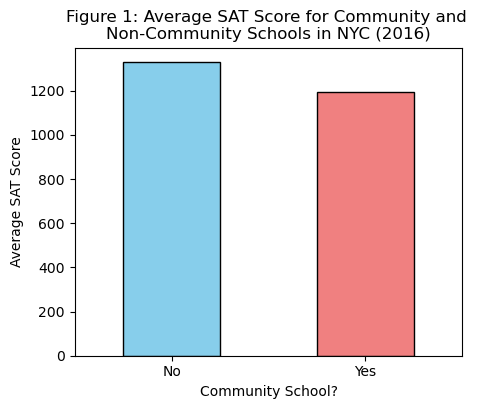

In [57]:
filtered_data = merged_data_2016.filter(['Average Total SAT Score', 'Community School?'])
filtered_data = filtered_data.dropna()
filtered_data = filtered_data.groupby('Community School?')['Average Total SAT Score'].mean()

# Plot the bar chart
plt.figure(figsize=(5, 4))
scores_community_or_no.plot(kind='bar', color=['skyblue', 'lightcoral'], edgecolor='black')

# Add labels and title
plt.xlabel('Community School?')
plt.ylabel('Average SAT Score')
plt.title('Figure 1: Average SAT Score for Community and \nNon-Community Schools in NYC (2016)')
plt.xticks(rotation=0)  # Rotate x-axis labels for readability

# Show the plot
plt.show()

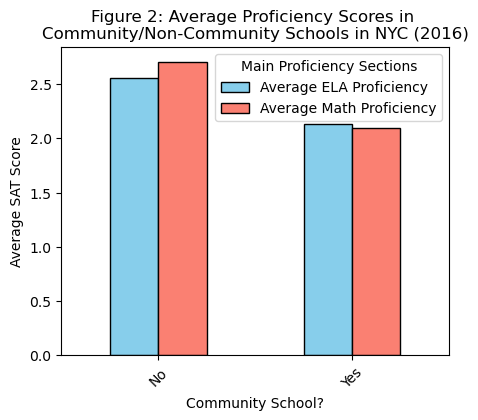

In [59]:
filtered_data = demographics_2016.groupby('Community School?')[['Average ELA Proficiency', 'Average Math Proficiency']].mean()

# Plot the bar chart
filtered_data.plot(kind='bar', figsize=(5, 4), color=['skyblue', 'salmon'], edgecolor='black')

# Add labels and title
plt.xlabel('Community School?')
plt.ylabel('Average SAT Score')
plt.title('Figure 2: Average Proficiency Scores in \nCommunity/Non-Community Schools in NYC (2016)')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title='Main Proficiency Sections')

# Show the plot
plt.show()

**Figures 1 and 2** show that Non-Community schools tend to perform better than Community Schools, in SAT Scores, Math and English Language Proficiency. Note that while the difference in average SAT Scores between the two groups is not too much (less than 200 points), the difference in Proficiency Scores is a bit higher, suggesting that Community Schools should receive not only SAT Exam support, but also basic Math and English programs to improve in these proficiency scores.

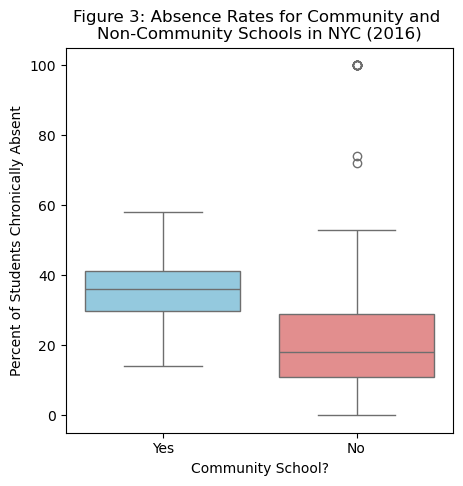

In [61]:
filtered_data = demographics_2016.filter(['Percent of Students Chronically Absent', 'Community School?']).dropna()

# Define a custom color palette
custom_palette = {"Yes": "skyblue", "No": "lightcoral"} 

# Create boxplot
plt.figure(figsize=(5, 5))
sns.boxplot(x='Community School?', y='Percent of Students Chronically Absent', 
            data=filtered_data, hue='Community School?', palette=custom_palette)

# Add labels and title
plt.xlabel("Community School?")
plt.ylabel("Percent of Students Chronically Absent")
plt.title("Figure 3: Absence Rates for Community and \nNon-Community Schools in NYC (2016)")

# Remove the legend (since hue duplicates x-axis labels)
plt.legend([],[], frameon=False)

# Show the plot
plt.show()

Aside from lower average SAT Scores, Community Schools tend to also have notoriously higher absence rates, ranging from 17 to 60% as shown in **Figure 3**. Although there’s some cases where Non-Community Schools exceed Community Schools’ absence rates, the majority of them have absence rates below 30% and some even have an absence rate of 0%, unlike Community Schools where the minimum is 17%.

### 4.2.Socioeconomic Factors: Economic Need Index and School Income Estimate.

Section 4.1. shows that the NYC Community Schools Initiative aimed to improve student outcomes by targeting schools with high absence rates and low SAT scores. However, it is essential to consider broader socioeconomic factors that may influence the academic indicators above (SAT Scores and Absence Rates). 


**Figure 4** examines the relationship between a school's Economic Need Index and its students' SAT scores, highlighting whether financial disadvantage correlates with lower academic performance. **Figure 5** explores the link between school income and economic need, distinguishing between community and non-community schools to assess whether financial disparities align with the designation of community schools.

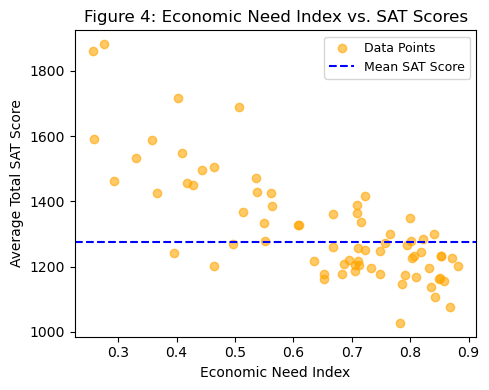

In [76]:
# Filter data
filtered_data = merged_data_2016.filter(['Average Total SAT Score', 'Economic Need Index'])

# Create a smaller figure
plt.figure(figsize=(5, 4))  # Adjust size: (width, height) in inches

# Scatter plot
plt.scatter(filtered_data['Economic Need Index'], 
            filtered_data['Average Total SAT Score'], 
            color='orange', alpha=0.6, label="Data Points")

# Add a horizontal reference line at the mean SAT score
plt.axhline(y=filtered_data['Average Total SAT Score'].mean(), 
            color='blue', linestyle='dashed', linewidth=1.5, label="Mean SAT Score")

# Add labels and title
plt.xlabel("Economic Need Index", fontsize=10)
plt.ylabel("Average Total SAT Score", fontsize=10)
plt.title("Figure 4: Economic Need Index vs. SAT Scores", fontsize=12)
plt.legend(fontsize=9)  # Slightly smaller legend text

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

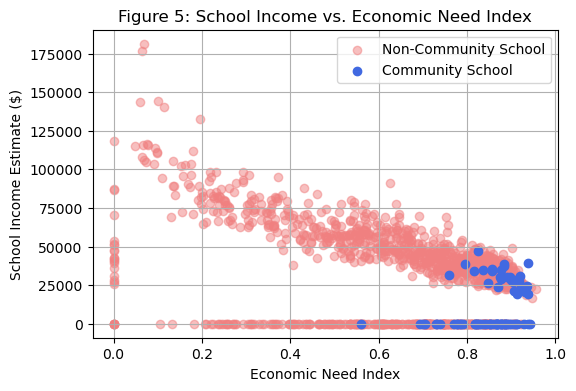

In [78]:
# Separate data into community and non-community schools
community_schools = demographics_2016[demographics_2016['Community School?'] == 'Yes']
non_community_schools = demographics_2016[demographics_2016['Community School?'] == 'No']

# Create scatter plot
plt.figure(figsize=(6,4))

plt.scatter(non_community_schools['Economic Need Index'], 
            non_community_schools['School Income Estimate'], 
            color='lightcoral', label='Non-Community School', alpha=0.5)

plt.scatter(community_schools['Economic Need Index'], 
            community_schools['School Income Estimate'], 
            color='royalblue', label='Community School', alpha=1)

# Add labels and title
plt.xlabel('Economic Need Index')
plt.ylabel('School Income Estimate ($)')
plt.title('Figure 5: School Income vs. Economic Need Index')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

The data reveals a negative correlation between Economic Need Index and SAT scores, as shown in **Figure 4**, suggesting that students in economically disadvantaged schools tend to score lower on the SAT. While community schools were designed to address such disparities, the persistently low scores indicate that additional resources may be needed to close the gap. We can also observe that students who score below average on the SAT, tend to have an Economic Need Index of at least 0.6, which coincides with the Economic Need Index for Community Schools in **Figure 5** (0.7 or more), indicating that these students perform below average in most cases.

**Figure 5** reinforces this point, showing that community schools (blue) tend to cluster at the highest levels of economic need while having significantly lower school income than non-community schools (red). Together, these findings suggest that while the Community Schools Initiative may have targeted the right schools, structural socioeconomic inequalities continue to play a critical role in shaping SAT performance. Addressing these disparities requires not only academic interventions but also broader socio economic reforms to ensure equitable access to quality education, like for example, ensuring all schools receive similar resources.

### 4.3. Differences by Race.

This section will dive into the racial composition of community versus non-community schools and the relationship between SAT performance and racial demographics.

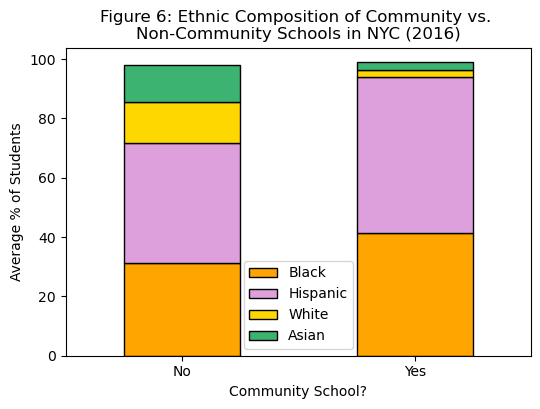

In [88]:
ethnicity_means = demographics_2016.groupby('Community School?')[['Percent Black', 'Percent Hispanic', 'Percent White', 'Percent Asian']].mean()

# Plot stacked bar chart
ethnicity_means.plot(kind='bar', stacked=True, color=['orange', 'plum', 'gold', 'mediumseagreen'], edgecolor='black', figsize=(6,4))

# Add labels and title
plt.xlabel('Community School?')
plt.ylabel('Average % of Students')
plt.title('Figure 6: Ethnic Composition of Community vs. \nNon-Community Schools in NYC (2016)')
plt.legend(['Black', 'Hispanic', 'White', 'Asian'])
plt.xticks(rotation=0)

# Show the plot
plt.show()

Going back to Section 3, **Figure 6** confirms that Community schools serve a significantly higher proportion of Black and Hispanic students, while non-community schools have a greater percentage of White and Asian students. This suggests that the Community Schools Initiative targeted schools with predominantly minority populations, reinforcing the connection between race, economic need, and academic performance, as they also targeted high Economic Need students as shown in Figure 5. 

Given the earlier findings on economic disadvantages among community schools, this graph shows the intersection of socioeconomic and racial disparities in NYC’s education system, showing that Hispanic and Black students tend to have higher Economic Need Index, which might be the reason why they score lower in the SAT Scores, as they attend schools with lower School Income Estimate.

It is also important to note that in general, NYC schools have more Hispanics and Black students, which might be simply due to the demographics of New York overall, however, these students also tend to be in Community Schools more than White and Asian students.

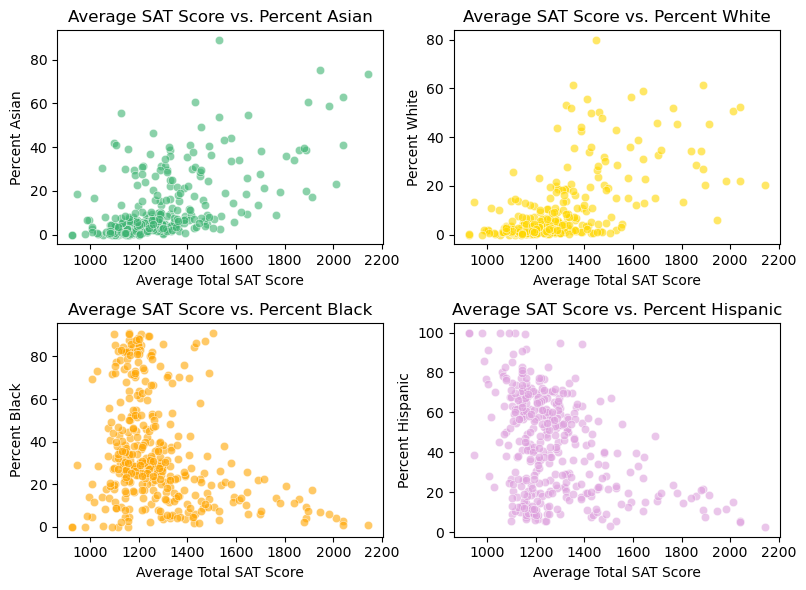

In [42]:
# Create a 2x2 figure layout
fig, axes = plt.subplots(2, 2, figsize=(8, 6))  

# Scatterplot: SAT Score vs. Percent Asian
sns.scatterplot(x=scores_2016["Average Total SAT Score"], 
                y=scores_2016["Percent Asian"], 
                color='mediumseagreen', alpha=0.6, ax=axes[0, 0])
axes[0, 0].set_title("Average SAT Score vs. Percent Asian")

# Scatterplot: SAT Score vs. Percent White
sns.scatterplot(x=scores_2016["Average Total SAT Score"], 
                y=scores_2016["Percent White"], 
                color='gold', alpha=0.6, ax=axes[0, 1])
axes[0, 1].set_title("Average SAT Score vs. Percent White")

# Scatterplot: SAT Score vs. Percent Black
sns.scatterplot(x=scores_2016["Average Total SAT Score"], 
                y=scores_2016["Percent Black"], 
                color='orange', alpha=0.6, ax=axes[1, 0])
axes[1, 0].set_title("Average SAT Score vs. Percent Black")

# Scatterplot: SAT Score vs. Percent Hispanic
sns.scatterplot(x=scores_2016["Average Total SAT Score"], 
                y=scores_2016["Percent Hispanic"], 
                color='plum', alpha=0.6, ax=axes[1, 1])
axes[1, 1].set_title("Average SAT Score vs. Percent Hispanic")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

SAT performance tends to vary by racial demographics, as shown above in **Figure 7**. The scatterplots display a negative correlation between SAT scores and the percentage of Black and Hispanic students, meaning that the more Hispanic and Black students in a school, the lower the average SAT Score. On the other hand, schools with a higher percentage of Asian and White students tend to have higher SAT scores. 

These results reinforce the idea that socioeconomic status—captured by the Economic Need Index—plays a significant role in shaping academic performance. Since community schools predominantly serve Black and Hispanic students and also students with higher Economic Need Index, we can conclude that these are the students that require the most assistance. Not only due to the high Economic Need Index but also because their lower SAT scores may affect their future opportunities and life quality.

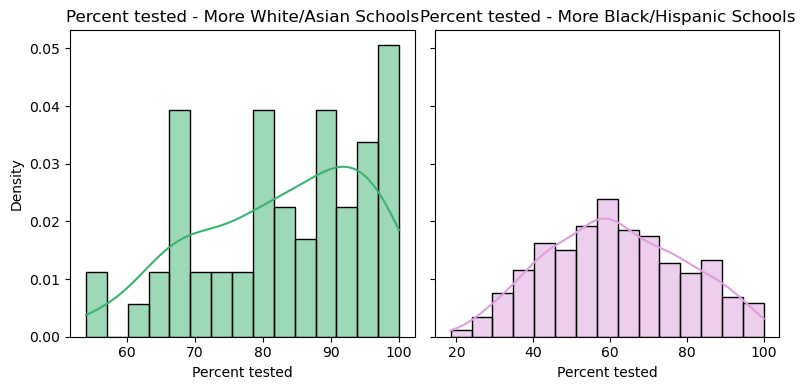

In [99]:
scores_2016['School Type'] = scores_2016.apply(lambda row: 
    'More Black/Hispanic' if (row['Percent Black'] + row['Percent Hispanic'] > row['Percent White'] + row['Percent Asian']) 
    else 'More White/Asian', axis=1)

# Filter dataset to remove missing values
filtered_data = scores_2016[['Percent Tested', 'School Type']].dropna()

# Create subplots for side-by-side density histograms
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

# Density Histogram for Schools with More White/Asian Students
sns.histplot(filtered_data[filtered_data['School Type'] == 'More White/Asian']['Percent Tested'], 
             bins=15, color='mediumseagreen', kde=True, stat='density', ax=axes[0])
axes[0].set_title("Percent tested - More White/Asian Schools")
axes[0].set_xlabel("Percent tested")

# Density Histogram for Schools with More Black/Hispanic Students
sns.histplot(filtered_data[filtered_data['School Type'] == 'More Black/Hispanic']['Percent Tested'], 
             bins=15, color='plum', kde=True, stat='density', ax=axes[1])
axes[1].set_title("Percent tested - More Black/Hispanic Schools")
axes[1].set_xlabel("Percent tested")

# Adjust layout
plt.tight_layout()
plt.show()

**Figure 7** shows the distribution of SAT participation rates in NYC schools, comparing those with higher percentages of White/Asian students to those with more Black/Hispanic students. Schools with predominantly White/Asian populations exhibit higher SAT testing rates, often clustering around 90–100%, suggesting stronger academic support systems, a more ingrained college-going culture, and better access to preparatory resources. 

In contrast, schools with more Black/Hispanic students show a wider distribution of participation, with many falling between 40–70%, reflecting potential barriers such as limited access to college counseling, discouragement to take the SAT, and socioeconomic challenges. These disparities highlight the uneven impact of NYC’s Community Schools Initiative, which, despite efforts to promote equity, appears to have had limited influence on closing gaps in SAT participation. 

## 4. Conclusion.

These results reinforce the idea that socioeconomic status—captured by the Economic Need Index—plays a significant role in shaping academic performance. Since community schools predominantly serve Black and Hispanic students and also students with higher Economic Need Index, we can conclude that these are the students that require the most assistance. Not only due to the high Economic Need Index but also because their lower SAT scores may affect their future opportunities and life quality. Considering that low SAT scores might be due to the lower School Income Estimate of the school they attend, it is important that policy makers revisit the benefits of Community Schools.

Addressing these disparities requires not only academic interventions but also broader socio economic reforms to ensure equitable access to quality education, like for example, ensuring all schools receive similar resources (to bridge the gap in School Income Estimate). High schools should also encourage students, mainly Black and Hispanic, to take the SAT, by offering support services to promote a college-going culture in all schools, and bridge the gap in percentage tested across mainly White/Asian schools and mainly Hispanic/Black schools.

## 5. References.

M. Liu, W. Lu and L. Zhao. (2024). Decoding SAT Scores: A Multifaceted Analysis of Socioeconomic and Educational Influences Across Diverse Regions. (2024). 2024 IEEE Integrated STEM Education Conference (ISEC), 1-2. https://doi-org.myaccess.library.utoronto.ca/10.1109/ISEC61299.2024.10665306

Everson, H. T., & Millsap, R. E. (2004). Beyond Individual Differences: Exploring School Effects on SAT Scores. Educational Psychologist, 39(3), 157–172. https://doi.org/10.1207/s15326985ep3903_2

Dixon-Roman, E. J., Everson, H. T., & Mcardle, J. J. (2013). Race, Poverty and SAT Scores: Modeling the Influences of Family Income on Black and White High School Students’ SAT Performance. Teachers College Record: The Voice of Scholarship in Education, 115(4), 1–33. https://doi.org/10.1177/016146811311500406 

Hess, A. J. (2019, October 3). Rich students get better SAT scores—here’s why. CNBC. Retrieved from https://www.cnbc.com/2019/10/03/rich-students-get-better-sat-scores-heres-why.html

PASSNYC. (n.d.). PASSNYC. Retrieved from https://www.passnyc.org/

NYC community schools. (n.d.). NYC Community Schools. Retrieved from https://nyccommunityschools.org/

Data sets:
NYC Open Data. (2017). Average SAT scores for NYC public schools. Retrieved from https://www.kaggle.com/datasets/nycopendata/high-schools 
PASSNYC. (2018). Data Science for Good: PASSNYC. Retrieved from https://www.kaggle.com/datasets/passnyc/data-science-for-good